##### Iмпортую бiблiотеки.

In [2]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils.np_utils import to_categorical
from keras import metrics
import numpy as np
import sympy as sp
from fractions import Fraction
import math
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


##### Завантажую данi про картинки.

In [3]:
(trainData, trainAnswer), (testData, testAnswer) = mnist.load_data()
print("Train data : {}".format(trainData.shape))
print("Test data : {}".format(testData.shape))

Train data : (60000, 28, 28)
Test data : (10000, 28, 28)


##### Реалiзував свою модель нейронної мережi.

In [3]:
class Perceptron:
    def __init__ (self, activFunc = (lambda x: x), inputSize = 1):
        self.activFunc = activFunc
        self.inputSize = inputSize
        self.weights = np.random.sample(inputSize)
        self.outputValue = 0
        self.lastInput = []
        self.lastOutput = 0
    
    def output(self, inputData):
        if len(inputData)!=self.inputSize:
            raise ValueError('Invalid size! Received: {}, should be: {}.'.format(len(inputData), self.inputSize))
        else:
            self.lastInput = inputData
            self.lastOutput = self.activFunc(self.wsm())
            return self.activFunc(self.wsm())
        
    def wsm(self):
        ws = 0
        for i in range(self.inputSize):
            ws+=self.weights[i]*self.lastInput[i]
        return ws
    

class mlpNeurallNetwork:
    def __init__ (self, size = (1,), activFunc = (lambda x: x), inputSize = 1, errorFunc = (lambda x, y: (x-y)**2)):
        self.inputSize = inputSize
        self.size = size+(1,)
        self.perceptrons = []
        self.errorFunc = errorFunc
        for i in self.size:
            self.perceptrons.append(i*[0])
        presize = inputSize
        for i in range(len(self.size)):
            for j in range(self.size[i]):
                self.perceptrons[i][j] = Perceptron(activFunc = activFunc, inputSize = presize)
            presize = self.size[i]
            
            
    def predict(self, inputData):
        self.lastInput = inputData
        oldInput = inputData
        for layer in self.perceptrons:
            newInput = []
            for pc in layer:
                newInput.append(pc.output(oldInput))
            oldInput = newInput
        return oldInput[0]
    
    def limit(self, func, x):
        return 1
    
    def dfs(self, lossdif, layer, r):
        if layer == -1:
            return
        for p in self.perceptrons[layer]:
            lm = self.limit(p.activFunc, p.wsm())
            for i in range(p.inputSize):
                self.dfs(lm*lossdif*p.weights[i], layer-1, r)
                p.weights[i]-=r*lm*self.lastInput[i]*lossdif
                

    
    def fit(self, inputData, answerData, r = 0.01):
        for i in range(len(inputData)):
            lossdif = 2*(self.predict(inputData[i]) - answerData[i])
            self.dfs(lossdif, len(self.size)-1, r)
                                            
                
    

##### Кодую данi в клас розмiрностi 10.

In [4]:
trainAnswer = to_categorical(trainAnswer, num_classes = 10)
testAnswer = to_categorical(testAnswer, num_classes = 10)

In [5]:
trainData = trainData/255.
testData = testData/255.

In [6]:
n_train, h, w = trainData.shape
n_test = testData.shape[0]

trainData = trainData.reshape(n_train, h * w)
testData = testData.reshape(n_test, h * w)
print("Train data : {}".format(trainData.shape))
print("Test data : {}".format(testData.shape))

Train data : (60000, 784)
Test data : (10000, 784)


##### Створюю бiблiотечну модель, додаю до неї один прихований шар з 784 нейронiв, та один вихiдний шар - на 10.

In [4]:
model = Sequential()
model.add(Dense(784, input_dim = 784,  activation='relu', kernel_initializer="normal"))
model.add(Dense(10,  activation='softmax'))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.categorical_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


##### Треную модель на ранiше завантажених даних.

In [8]:
history = model.fit(trainData, trainAnswer, batch_size=200, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2805 - categorical_accuracy: 0.9199
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1123 - categorical_accuracy: 0.9675
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0716 - categorical_accuracy: 0.9798
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0497 - categorical_accuracy: 0.9858
Epoch 5/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0347 - categorical_accuracy: 0.9902
Epoch 6/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0263 - categorical_accuracy: 0.9928
Epoch 7/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0202 - categorical_accuracy: 0.9948
Epoch 8/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0139 - categorical_accuracy: 0.9967
Epoch 9/10
60000/60000 [==============================]

##### Будую графiки втрат та точоcтей пiд час тренування.

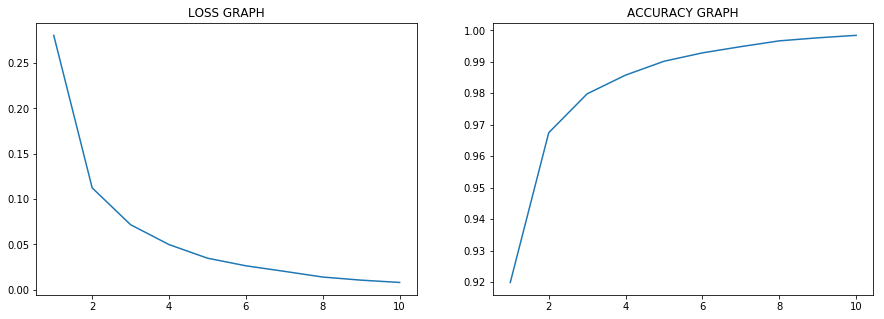

In [9]:
fig, (loss_graph, acc_graph) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

acc_list, loss_list = history.history['categorical_accuracy'], history.history['loss']

listX = range(1, 11)
loss_graph.plot(listX, loss_list);
loss_graph.set_title('LOSS GRAPH');
acc_graph.plot(listX, acc_list);
acc_graph.set_title('ACCURACY GRAPH');

##### Результати тренування.

In [10]:
loss, accuracy = model.evaluate(testData, testAnswer)
print('Loss on tests: ', loss)
print('Accuracy: ', accuracy)

10000/10000 [==============================] - 1s 101us/step
Loss on tests:  0.07000552951387362
Accuracy:  0.9811


##### Завантажую данi з сifar10.

In [11]:
from keras.datasets import cifar10

In [13]:
(trainData, trainAnswer), (testData, testAnswer)  = cifar10.load_data()
print("Train data : {}".format(trainData.shape))
print("Test data : {}".format(testData.shape))

Train data : (50000, 32, 32, 3)
Test data : (10000, 32, 32, 3)


In [17]:
n_train, height, width, channels = trainData.shape
n_test = testData.shape[0]

trainData = trainData.reshape(n_train, height*width*channels)
testData = testData.reshape(n_test, height*width*channels)
print("Train data : {}".format(trainData.shape))
print("Test data : {}".format(testData.shape))

Train data : (50000, 3072)
Test data : (10000, 3072)


In [18]:
trainData = trainData/255.
testData = testData/255.

trainAnswer = to_categorical(trainAnswer, num_classes = 10)
testAnswer = to_categorical(testAnswer, num_classes = 10)

##### Створюю нову модель, та додаю декiлька шарiв нейронiв. 

In [24]:
newModel = Sequential()
newModel.add(Dense(300, input_dim = 3072,  activation='relu', kernel_initializer="normal"))
newModel.add(Dense(300, input_dim = 3072,  activation='relu', kernel_initializer="normal"))
newModel.add(Dense(150, input_dim = 3072,  activation='relu', kernel_initializer="normal"))
newModel.add(Dense(10,  activation='softmax'))
newModel.summary()
newModel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.categorical_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 300)               921900    
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_16 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1510      
Total params: 1,058,860
Trainable params: 1,058,860
Non-trainable params: 0
_________________________________________________________________


##### Тренування моделi та побудова графiкiв.

In [25]:
history = newModel.fit(trainData, trainAnswer, batch_size=300, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 11s 211us/step - loss: 1.9026 - categorical_accuracy: 0.3061
Epoch 2/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.6691 - categorical_accuracy: 0.4033
Epoch 3/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.5905 - categorical_accuracy: 0.4322
Epoch 4/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.5278 - categorical_accuracy: 0.4522
Epoch 5/10
50000/50000 [==============================] - 10s 207us/step - loss: 1.4763 - categorical_accuracy: 0.4729
Epoch 6/10
50000/50000 [==============================] - 13s 253us/step - loss: 1.4335 - categorical_accuracy: 0.4895
Epoch 7/10
50000/50000 [==============================] - 11s 211us/step - loss: 1.3975 - categorical_accuracy: 0.5000
Epoch 8/10
50000/50000 [==============================] - 10s 205us/step - loss: 1.3691 - categorical_accuracy: 0.5122
Epoch 9/10
50000/50000 [========================

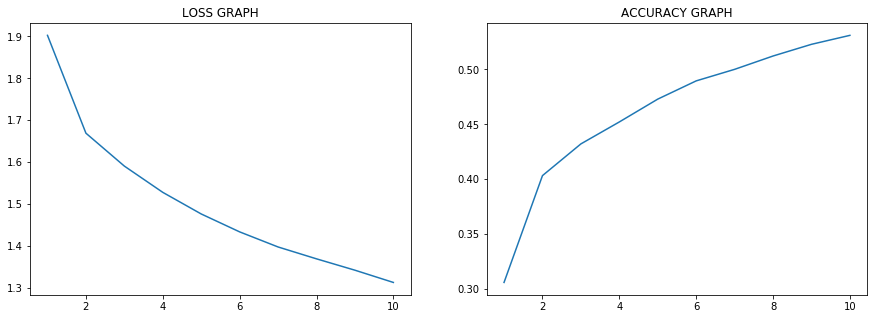

In [26]:
fig, (loss_graph, acc_graph) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

acc_list, loss_list = history.history['categorical_accuracy'], history.history['loss']

listX = range(1, 11)
loss_graph.plot(listX, loss_list);
loss_graph.set_title('LOSS GRAPH');
acc_graph.plot(listX, acc_list);
acc_graph.set_title('ACCURACY GRAPH');

##### Результати при проходженнi тестових даних.

In [28]:
cftest_loss, cftest_accuracy = newModel.evaluate(testData, testAnswer)
print('Loss on tests: ', cftest_loss)
print('Accuracy: ', cftest_accuracy)

10000/10000 [==============================] - 2s 164us/step
Loss on tests:  1.38714591255188
Accuracy:  0.5113
